# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [3]:
from sklearn import datasets
wine=datasets.load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [7]:
df["target"]=wine.target

In [8]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
X=df.drop("target",axis=1)
y=df.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
help(KMeans())

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the 

In [12]:
cl=KMeans(n_clusters=8)

In [13]:
cl.fit(X)

KMeans()

In [14]:
cl.inertia_

324933.85242214304

In [15]:
cl.labels_

array([1, 1, 5, 3, 4, 3, 5, 5, 1, 1, 3, 5, 5, 1, 3, 5, 5, 1, 3, 7, 4, 4,
       1, 1, 7, 7, 5, 5, 7, 1, 5, 3, 1, 5, 1, 7, 7, 1, 1, 4, 7, 1, 1, 4,
       7, 1, 1, 1, 1, 5, 1, 5, 5, 5, 1, 1, 1, 5, 5, 2, 4, 2, 6, 0, 0, 4,
       2, 2, 4, 4, 7, 0, 2, 1, 7, 0, 0, 2, 4, 2, 0, 4, 6, 2, 2, 2, 2, 6,
       4, 6, 2, 2, 2, 0, 0, 7, 6, 0, 6, 0, 4, 6, 2, 0, 4, 0, 2, 2, 0, 4,
       6, 0, 6, 0, 0, 0, 2, 0, 0, 6, 6, 2, 0, 0, 0, 0, 0, 2, 0, 6, 6, 2,
       6, 6, 6, 4, 4, 2, 6, 6, 6, 4, 2, 2, 7, 7, 0, 6, 6, 2, 2, 2, 0, 4,
       6, 4, 2, 7, 6, 6, 2, 4, 6, 4, 6, 2, 4, 4, 4, 6, 2, 2, 6, 4, 4, 7,
       7, 6])

In [16]:
silhouette_score(X,labels=cl.labels_)

0.5363482509606238

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [17]:
cl2=KMeans(n_clusters=5).fit(X)

In [18]:
cl2.labels_

array([3, 3, 3, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 0, 0,
       3, 3, 0, 0, 3, 2, 0, 3, 2, 2, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 4,
       0, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 0, 4, 0, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 0, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 1, 4, 0, 0, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 0, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4, 1, 1, 4, 0, 0, 0,
       0, 4])

In [19]:
cl2.inertia_

916379.1871539169

In [20]:
silhouette_score(X,labels=cl2.labels_)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [21]:
cl3=KMeans(n_clusters=3).fit(X)

In [22]:
cl3.inertia_

2370689.686782968

In [23]:
silhouette_score(X,labels=cl3.labels_)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [25]:
from yellowbrick.cluster import KElbowVisualizer


In [29]:
help(KElbowVisualizer)

Help on class KElbowVisualizer in module yellowbrick.cluster.elbow:

class KElbowVisualizer(yellowbrick.cluster.base.ClusteringScoreVisualizer)
 |  KElbowVisualizer(estimator, ax=None, k=10, metric='distortion', timings=True, locate_elbow=True, **kwargs)
 |  
 |  The K-Elbow Visualizer implements the "elbow" method of selecting the
 |  optimal number of clusters for K-means clustering. K-means is a simple
 |  unsupervised machine learning algorithm that groups data into a specified
 |  number (k) of clusters. Because the user must specify in advance what k to
 |  choose, the algorithm is somewhat naive -- it assigns all members to k
 |  clusters even if that is not the right k for the dataset.
 |  
 |  The elbow method runs k-means clustering on the dataset for a range of
 |  values for k (say from 1-10) and then for each value of k computes an
 |  average score for all clusters. By default, the ``distortion`` score is
 |  computed, the sum of square distances from each point to its as

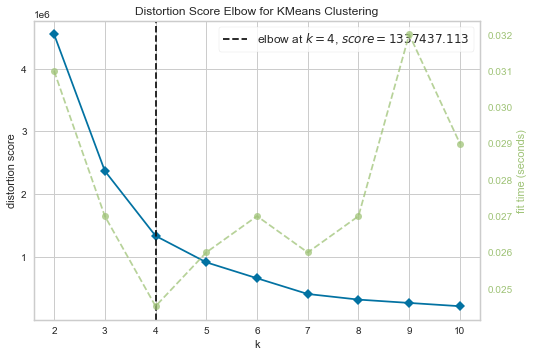

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
visualizer = KElbowVisualizer(cl3, k=10, metric="distortion")

visualizer.fit(X)        
visualizer.show() 

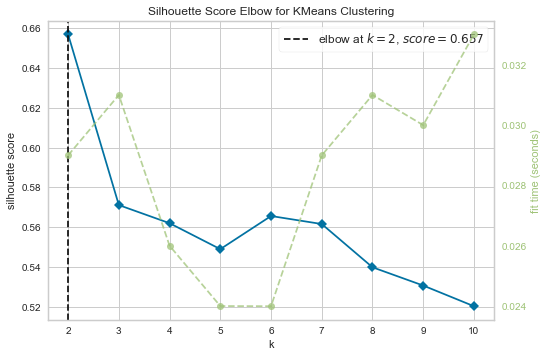

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
visualizer = KElbowVisualizer(cl3, k=10, metric="silhouette")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

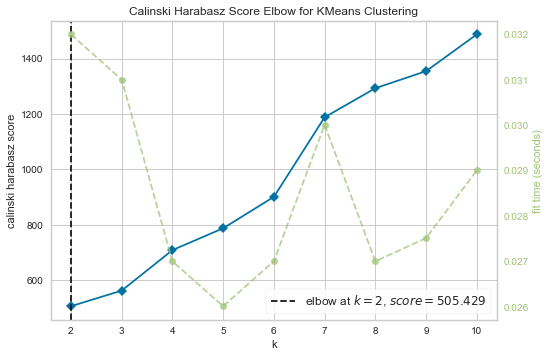

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [37]:
visualizer = KElbowVisualizer(cl3, k=10, metric="calinski_harabasz")

visualizer.fit(X)        
visualizer.show() 

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [38]:
from sklearn.cluster import AgglomerativeClustering


In [68]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed",

In [39]:
cl4=AgglomerativeClustering().fit(X)

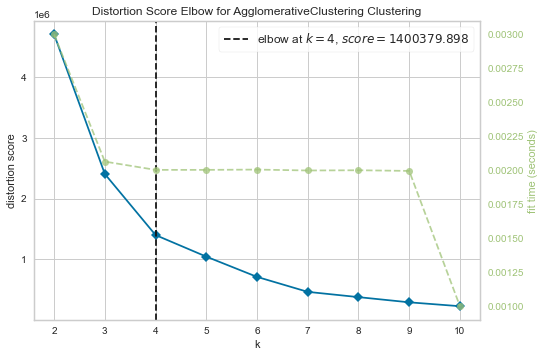

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
visualizer = KElbowVisualizer(cl4, k=10, metric="distortion")

visualizer.fit(X)        
visualizer.show() 

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [42]:
cl5=KMeans(4)
cl5.fit(X)

KMeans(n_clusters=4)

In [44]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = cl5.labels_

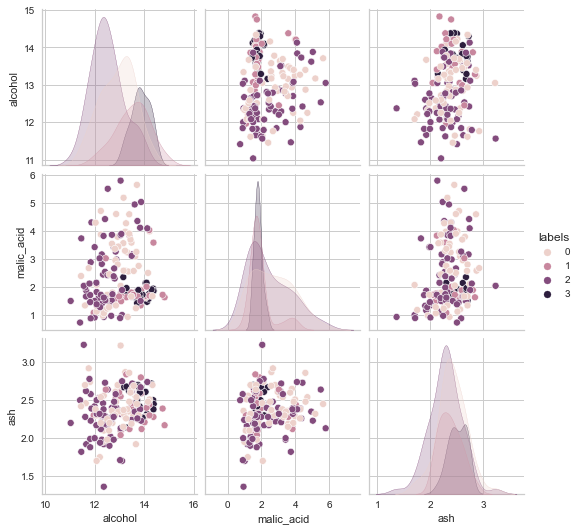

In [46]:
#Primer bin
sns.pairplot(X[bin1], hue='labels')

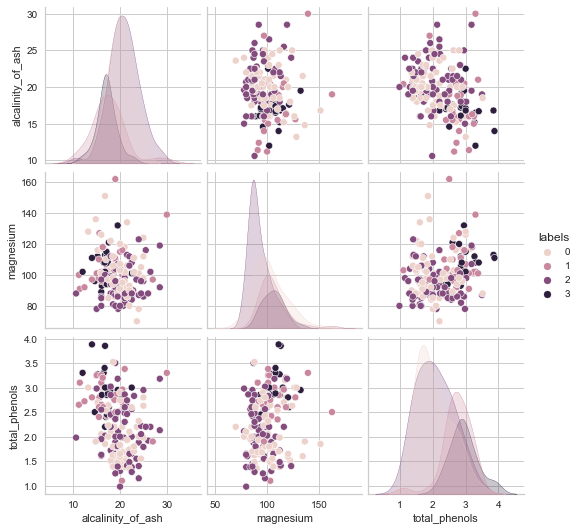

In [47]:
#Segundo bin
sns.pairplot(X[bin2], hue='labels')

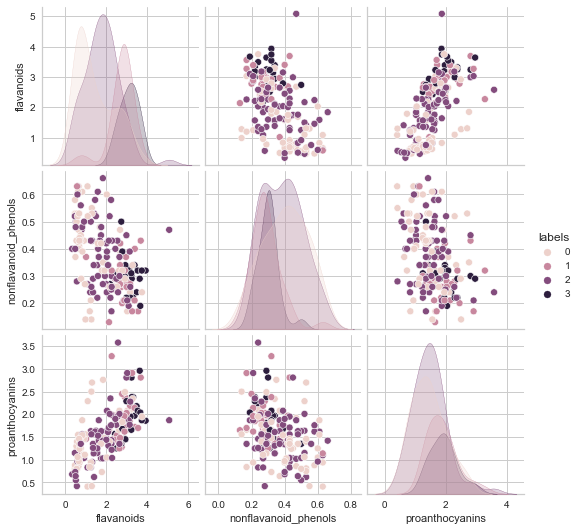

In [48]:
#Tercer bin
sns.pairplot(X[bin3], hue='labels')

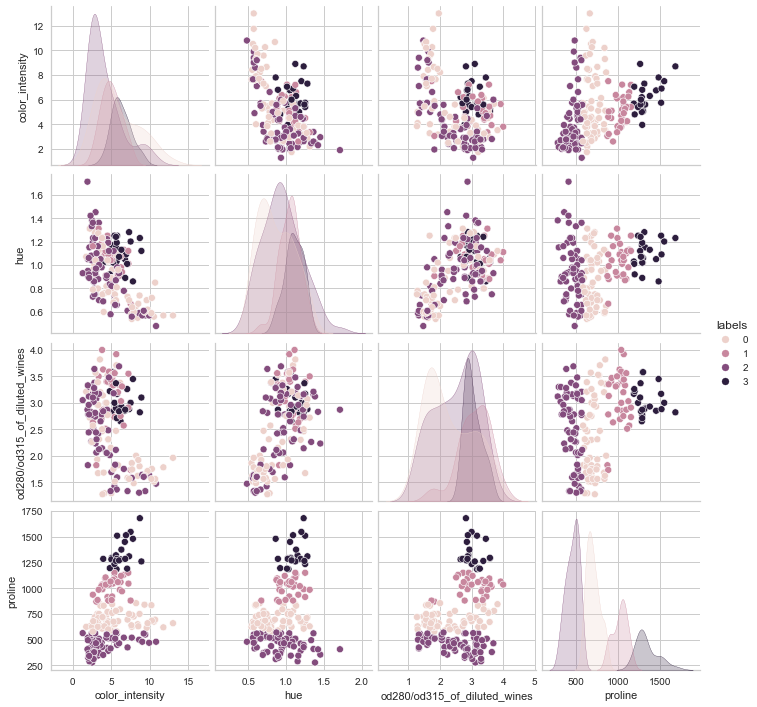

In [49]:
#Cuarto bin
sns.pairplot(X[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()
X_pca=StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X_pca)

Text(0, 0.5, 'PCA 2')

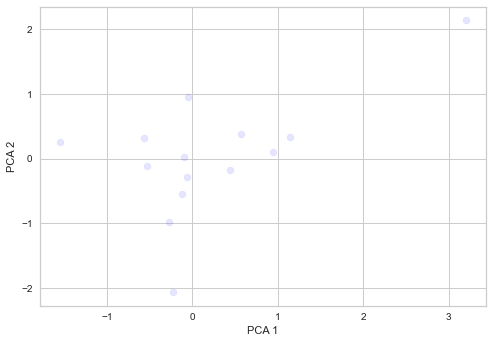

In [62]:
plt.scatter(principalComponents[0], principalComponents[1], alpha=.1, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
